In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# 測定に使用したデータ


In [2]:
HV_original_data_left = {
    "HV_D1_L": [
        4.5,
        29.6,
        18.0,
        12.8,
        14.3,
        15.7,
        6.1,
        11.5,
        14.2,
        18.1,
        12.5,
        16.8,
        17.8,
        5.5,
    ],
    "HV_D2_L": [
        2.4,
        29.5,
        15.3,
        9.8,
        13.1,
        16.0,
        6.9,
        11.5,
        13.7,
        18.1,
        14.2,
        13.0,
        18.2,
        7.6,
    ],
    "SegPCA_L": [
        0.2,
        26.3,
        16.5,
        9.1,
        11.9,
        12.2,
        6.6,
        11.2,
        10.6,
        17.6,
        13.7,
        12.9,
        18.9,
        10.3,
    ],
}

HV_original_data_right = {
    "HV_D1_R": [
        4.2,
        29.5,
        20.1,
        11.5,
        9.2,
        18.9,
        9.5,
        9.7,
        15.0,
        22.3,
        13.0,
        18.8,
        12.0,
        8.7,
    ],
    "HV_D2_R": [
        4.1,
        28.0,
        17.2,
        8.4,
        5.7,
        16.3,
        6.7,
        10.9,
        14.9,
        19.8,
        11.7,
        15.7,
        10.5,
        12.1,
    ],
    "SegPCA_R": [
        1.3,
        25.8,
        18.4,
        7,
        5.1,
        14.9,
        7.2,
        9.9,
        11.6,
        20.2,
        11.4,
        14.7,
        12.7,
        9,
    ],
}

M1M5_original_data_left = {
    "M1M5_D1_L": [
        26.15,
        40.781,
        26.377,
        29.49,
        30.639,
        28.259,
        29.585,
        29.675,
        28.217,
        32.251,
        30.488,
        34.87,
        35.212,
        26.634,
    ],
    "M1M5_D2_L": [
        21.408,
        40.608,
        23.794,
        24.54,
        28.133,
        25.809,
        31.521,
        29.829,
        28.185,
        31.023,
        29.117,
        31.558,
        33.517,
        29.081,
    ],
    "SegPCA_L": [
        21.6,
        37.3,
        24.2,
        21,
        25.7,
        23.2,
        29.2,
        27.7,
        26.4,
        28.8,
        27,
        30.8,
        30.1,
        18.6,
    ],
}
M1M5_original_data_right = {
    "M1M5_D1_R": [
        26.528,
        37.671,
        28.924,
        28.528,
        30.256,
        27.926,
        27.401,
        29.616,
        28.212,
        31.25,
        30.84,
        32.828,
        36.327,
        27.336,
    ],
    "M1M5_D2_R": [
        24.026,
        38.249,
        28.655,
        26.294,
        28.776,
        26.976,
        31.316,
        31.039,
        29.267,
        30.403,
        29.526,
        30.189,
        34.146,
        28.129,
    ],
    "SegPCA_R": [
        23.2,
        35.3,
        27.1,
        22.7,
        27.1,
        24.2,
        30.1,
        28.3,
        26.1,
        30.5,
        28.2,
        33.3,
        33.3,
        22.4,
    ],
}

# 測定に使用した関数


In [3]:
def calculate_slope(vector):
    x, y = vector

    if x != 0:
        slope = y / x
    else:
        slope = math.inf if y > 0 else -math.inf

    return slope


from sklearn.decomposition import PCA


def process_pca(data1, data2, x_label, y_label, title, save_path, mode):
    data = np.array([data1, data2]).T
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(data)
    # 主成分軸ベクトル
    loadings = pca.components_

    # 重心を取得して、重心位置に点を描画する
    data_mean = pca.mean_
    # plt.scatter(data_mean[0], data_mean[1], c='red', marker='x', s=100, label='Centroid')

    # 45°直線のベクトル
    angle = np.deg2rad(45)
    vector45 = np.array([np.cos(angle), np.sin(angle)])

    # for i, (x, y) in enumerate(zip(data1, data2)):
    #     plt.annotate(str(i + 1), (x + 0.3, y + 0.3), fontsize=10)

    # 第一主成分軸を直線で描画
    mean_d1, mean_d2 = np.mean(data1), np.mean(data2)
    plt.plot(
        [mean_d1 - loadings[0, 0] * 40, mean_d1 + loadings[0, 0] * 40],
        [mean_d2 - loadings[0, 1] * 40, mean_d2 + loadings[0, 1] * 40],
        color="orange",
    )

    # 主成分軸の分散を出力
    print(f"第一主成分軸の分散 : {pca.explained_variance_[0]}")
    print(f"第二主成分軸の分散 : {pca.explained_variance_[1]}")

    # 第一主成分軸の傾きと切片を算出
    slope = calculate_slope(loadings[0])
    intercept = data_mean[1] - slope * data_mean[0]
    print(f"第一主成分軸の傾き : {slope}")
    print(f"第一主成分軸の切片 : {intercept}")

    # 第一主成分軸と第二主成分軸の寄与率出力
    print(f"第一主成分軸の寄与率 : {pca.explained_variance_ratio_[0]}")
    print(f"第二主成分軸の寄与率 : {pca.explained_variance_ratio_[1]}")

    # 共分散行列から固有値を取得
    eigenvalues = pca.explained_variance_

    # 固有値から各主成分軸の標準偏差を計算
    std_dev_first_component = np.sqrt(eigenvalues[0])
    std_dev_second_component = np.sqrt(eigenvalues[1])

    print(f"第一主成分軸の標準偏差 : {std_dev_first_component}")
    print(f"第二主成分軸の標準偏差 : {std_dev_second_component}")

    plt.scatter(data1, data2, c="blue", marker="o")

    if mode == "HV":
        min_plt = 0
        max_plt = 35
    else:
        min_plt = 15
        max_plt = 40
    plt.xlim(min_plt, max_plt)
    plt.ylim(min_plt, max_plt)

    plt.plot([0, 45], [0, 45], linestyle="--", color="black")
    plt.tick_params(axis="both", which="major", labelsize=16)

    plt.grid(True)
    plt.savefig(save_path)
    plt.show()

第一主成分軸の分散 : 80.3818892667176
第二主成分軸の分散 : 1.5506931508648523
第一主成分軸の傾き : 0.9929634857575842
第一主成分軸の切片 : -0.4793565777533697
第一主成分軸の寄与率 : 0.9810735472371479
第二主成分軸の寄与率 : 0.018926452762851997
第一主成分軸の標準偏差 : 8.965594752536923
第二主成分軸の標準偏差 : 1.2452683047700412


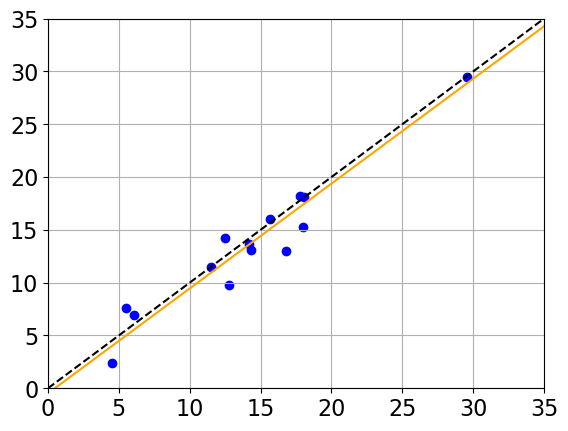

第一主成分軸の分散 : 74.93237731565841
第二主成分軸の分散 : 3.436633673352602
第一主成分軸の傾き : 0.9439398752097407
第一主成分軸の切片 : -0.595266526171633
第一主成分軸の寄与率 : 0.9561480535484301
第二主成分軸の寄与率 : 0.043851946451569875
第一主成分軸の標準偏差 : 8.65634895990558
第二主成分軸の標準偏差 : 1.8538159761294006


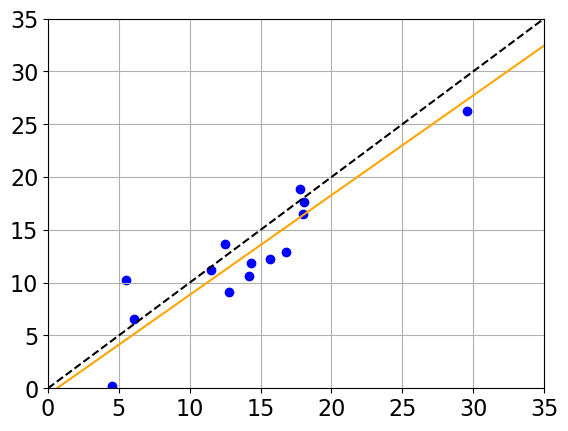

第一主成分軸の分散 : 76.24531146479453
第二主成分軸の分散 : 1.56705117256812
第一主成分軸の傾き : 0.9533670821942023
第一主成分軸の切片 : -0.1765991899544641
第一主成分軸の寄与率 : 0.9798611541989644
第二主成分軸の寄与率 : 0.02013884580103573
第一主成分軸の標準偏差 : 8.731856129414554
第二主成分軸の標準偏差 : 1.2518191453113825


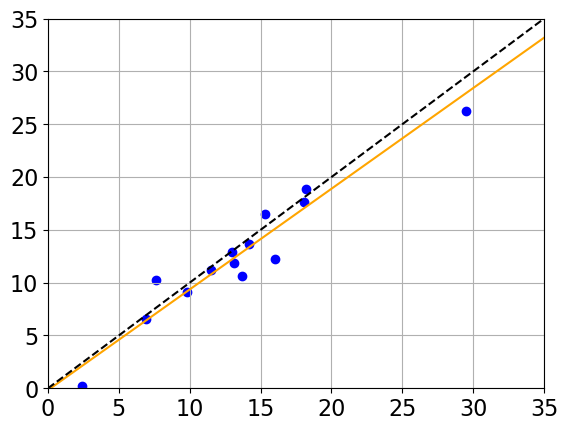

In [4]:
HV_D1_L = HV_original_data_left["HV_D1_L"]
HV_D2_L = HV_original_data_left["HV_D2_L"]
SegPCA_L = HV_original_data_left["SegPCA_L"]
process_pca(
    HV_D1_L,
    HV_D2_L,
    x_label="D1",
    y_label="D2",
    title="HV_Left",
    save_path="assets/HV_D1_D2_L.png",
    mode="HV",
)
process_pca(
    HV_D1_L,
    SegPCA_L,
    x_label="D1",
    y_label="SegPCA",
    title="HV_Left",
    save_path="assets/HV_D1_SegPCA_L.png",
    mode="HV",
)
process_pca(
    HV_D2_L,
    SegPCA_L,
    x_label="D2",
    y_label="SegPCA",
    title="HV_Left",
    save_path="assets/HV_D2_SegPCA_L.png",
    mode="HV",
)

第一主成分軸の分散 : 83.2242275569661
第二主成分軸の分散 : 1.838409805671271
第一主成分軸の傾き : 0.9345977122513707
第一主成分軸の切片 : -0.5116126399769598
第一主成分軸の寄与率 : 0.9783875757598038
第二主成分軸の寄与率 : 0.02161242424019606
第一主成分軸の標準偏差 : 9.122731364945814
第二主成分軸の標準偏差 : 1.3558797165203376


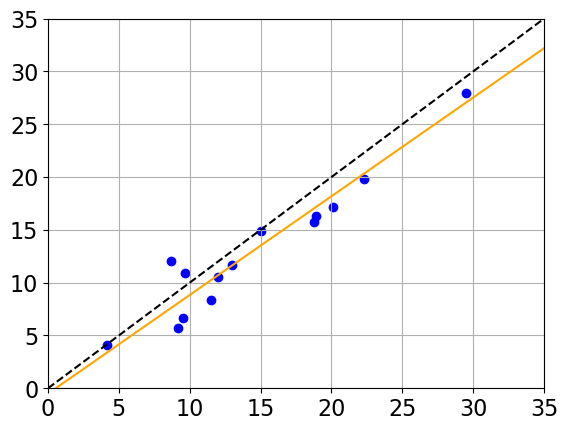

第一主成分軸の分散 : 85.20908865230041
第二主成分軸の分散 : 1.516405853194107
第一主成分軸の傾き : 0.9551966255065263
第一主成分軸の切片 : -1.723699785894354
第一主成分軸の寄与率 : 0.9825148779855267
第二主成分軸の寄与率 : 0.01748512201447332
第一主成分軸の標準偏差 : 9.23087691675609
第二主成分軸の標準偏差 : 1.2314243189064065


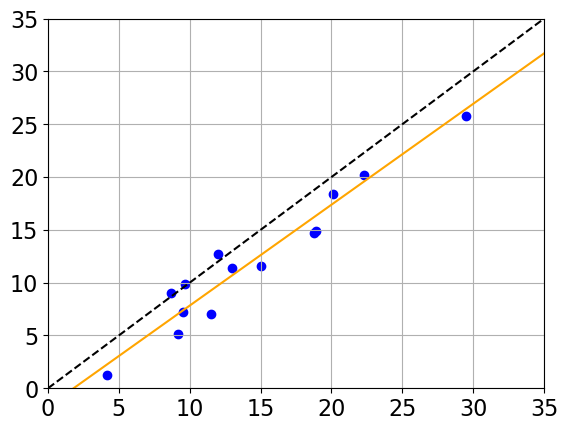

第一主成分軸の分散 : 79.90945628329072
第二主成分軸の分散 : 1.3195547057202208
第一主成分軸の傾き : 1.021387319241032
第一主成分軸の切片 : -1.192320864419134
第一主成分軸の寄与率 : 0.9837551302219014
第二主成分軸の寄与率 : 0.016244869778098574
第一主成分軸の標準偏差 : 8.939208929390269
第二主成分軸の標準偏差 : 1.148718723500327


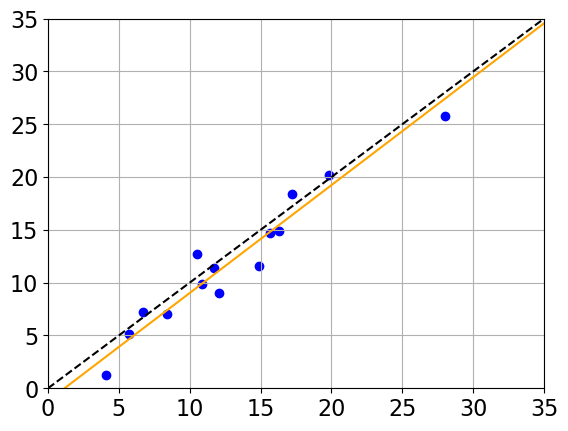

In [5]:
HV_D1_R = HV_original_data_right["HV_D1_R"]
HV_D2_R = HV_original_data_right["HV_D2_R"]
SegPCA_R = HV_original_data_right["SegPCA_R"]
process_pca(
    HV_D1_R,
    HV_D2_R,
    x_label="D1",
    y_label="D2",
    title="HV_Right",
    save_path="assets/HV_D1_D2_R.png",
    mode="HV",
)
process_pca(
    HV_D1_R,
    SegPCA_R,
    x_label="D1",
    y_label="SegPCA",
    title="HV_Right",
    save_path="assets/HV_D1_SegPCA_R.png",
    mode="HV",
)
process_pca(
    HV_D2_R,
    SegPCA_R,
    x_label="D2",
    y_label="SegPCA",
    title="HV_Right",
    save_path="assets/HV_D2_SegPCA_R.png",
    mode="HV",
)

第一主成分軸の分散 : 36.46323290732012
第二主成分軸の分散 : 2.174566944328248
第一主成分軸の傾き : 1.1857586403166833
第一主成分軸の切片 : -7.151882462975664
第一主成分軸の寄与率 : 0.9437191829587191
第二主成分軸の寄与率 : 0.056280817041280795
第一主成分軸の標準偏差 : 6.0384793538870465
第二主成分軸の標準偏差 : 1.4746412934433404


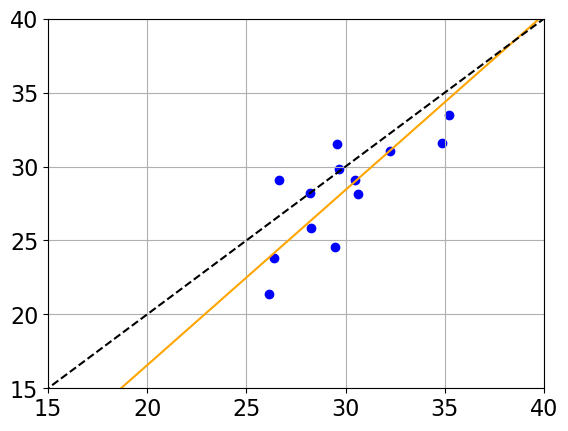

第一主成分軸の分散 : 36.935231077518466
第二主成分軸の分散 : 2.2469957356683476
第一主成分軸の傾き : 1.202703214886812
第一主成分軸の切片 : -10.279448113607458
第一主成分軸の寄与率 : 0.942652679073561
第二主成分軸の寄与率 : 0.057347320926439
第一主成分軸の標準偏差 : 6.077436225705578
第二主成分軸の標準偏差 : 1.4989982440511223


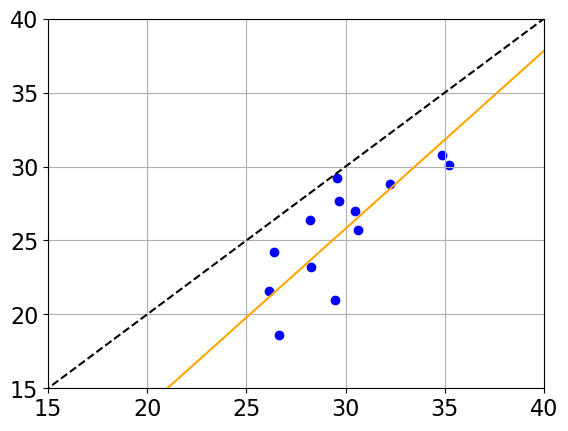

第一主成分軸の分散 : 41.672279052924495
第二主成分軸の分散 : 3.296261018504068
第一主成分軸の傾き : 1.0142887189183423
第一主成分軸の切片 : -3.025325345079331
第一主成分軸の寄与率 : 0.926698509374148
第二主成分軸の寄与率 : 0.07330149062585194
第一主成分軸の標準偏差 : 6.455406962610839
第二主成分軸の標準偏差 : 1.8155608000020456


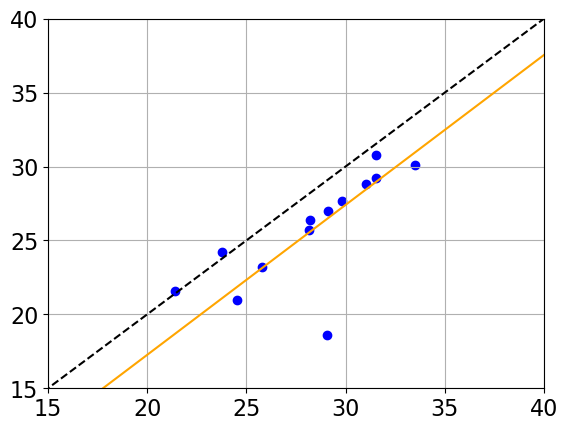

In [6]:
M1M5_D1_L = M1M5_original_data_left["M1M5_D1_L"]
M1M5_D2_L = M1M5_original_data_left["M1M5_D2_L"]
SegPCA_L = M1M5_original_data_left["SegPCA_L"]
process_pca(
    M1M5_D1_L,
    M1M5_D2_L,
    x_label="D1",
    y_label="D2",
    title="M1M5_Left",
    save_path="assets/M1M5_D1_D2_L.png",
    mode="M1M5",
)
process_pca(
    M1M5_D1_L,
    SegPCA_L,
    x_label="D1",
    y_label="SegPCA",
    title="M1M5_Left",
    save_path="assets/M1M5_D1_SegPCA_L.png",
    mode="M1M5",
)
process_pca(
    M1M5_D2_L,
    SegPCA_L,
    x_label="D2",
    y_label="SegPCA",
    title="M1M5_Left",
    save_path="assets/M1M5_D2_SegPCA_L.png",
    mode="M1M5",
)

第一主成分軸の分散 : 21.270725593822625
第二主成分軸の分散 : 1.7193471204630972
第一主成分軸の傾き : 1.0344292392904364
第一主成分軸の切片 : -1.5169790157655925
第一主成分軸の寄与率 : 0.9252134979375373
第二主成分軸の寄与率 : 0.07478650206246272
第一主成分軸の標準偏差 : 4.612019687059306
第二主成分軸の標準偏差 : 1.3112387732457798


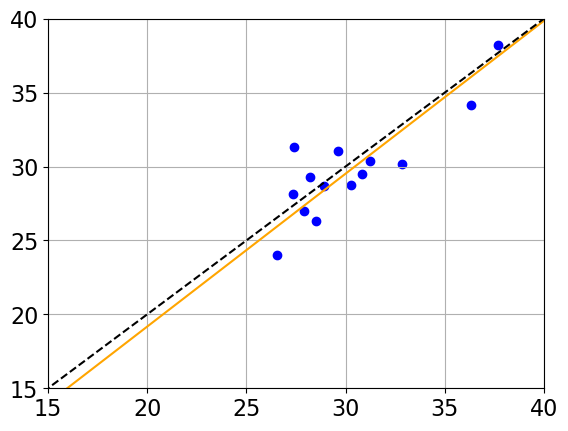

第一主成分軸の分散 : 26.327154722564053
第二主成分軸の分散 : 1.946113678534848
第一主成分軸の傾き : 1.2825353939061086
第一主成分軸の切片 : -10.82408156289754
第一主成分軸の寄与率 : 0.9311677146438716
第二主成分軸の寄与率 : 0.06883228535612841
第一主成分軸の標準偏差 : 5.130999388283344
第二主成分軸の標準偏差 : 1.395031784059004


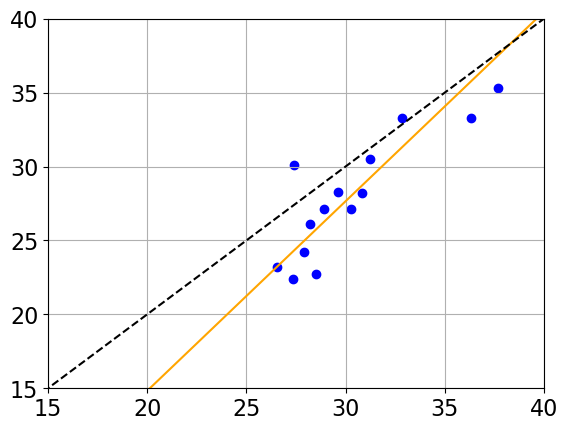

第一主成分軸の分散 : 27.14030818625632
第二主成分軸の分散 : 1.7945181049524643
第一主成分軸の傾き : 1.235585381642146
第一主成分軸の切片 : -8.816284562595726
第一主成分軸の寄与率 : 0.9379806850439711
第二主成分軸の寄与率 : 0.06201931495602894
第一主成分軸の標準偏差 : 5.209636089618575
第二主成分軸の標準偏差 : 1.3395962469910343


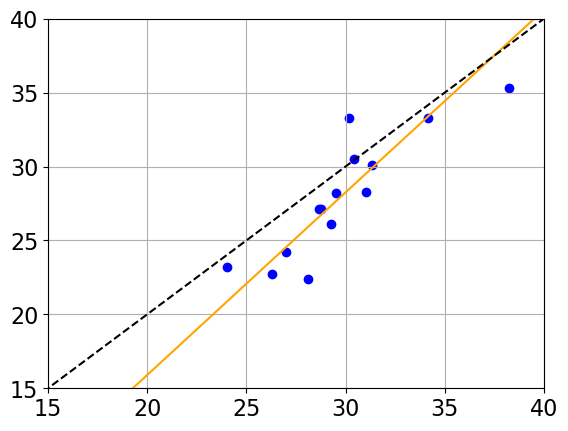

In [7]:
M1M5_D1_R = M1M5_original_data_right["M1M5_D1_R"]
M1M5_D2_R = M1M5_original_data_right["M1M5_D2_R"]
SegPCA_R = M1M5_original_data_right["SegPCA_R"]
process_pca(
    M1M5_D1_R,
    M1M5_D2_R,
    x_label="D1",
    y_label="D2",
    title="M1M5_Right",
    save_path="assets/M1M5_D1_D2_R.png",
    mode="M1M5",
)
process_pca(
    M1M5_D1_R,
    SegPCA_R,
    x_label="D1",
    y_label="SegPCA",
    title="M1M5_Right",
    save_path="assets/M1M5_D1_SegPCA_R.png",
    mode="M1M5",
)
process_pca(
    M1M5_D2_R,
    SegPCA_R,
    x_label="D2",
    y_label="SegPCA",
    title="M1M5_Right",
    save_path="assets/M1M5_D2_SegPCA_R.png",
    mode="M1M5",
)